In [1]:
import LinearAlgebra
LA = LinearAlgebra

include("mplstyle.jl");

# Exercise 2.2

Find the inverse of matrix B

# Exercise 2.4
Implement the backtracking line search algorithm.

In [2]:
# f: objective function
# ∇f: gradient of the objective function
# x: current point
# d: step direction
# p: step size reduction p∈(0,1)
# β: minimum downward slope is -β∇f(x)

function linesearch(f, ∇f, x, d; p=0.8, β = 1.0*10^-4)
    
    # initialize step length factor
    α = 1.0
    
    # ======================================================
    # implement the while loop where α is reduced using the Armijo Condition as stopping criterion
    
    # while ...
    #    do something
    # end
    
    # ======================================================
    
    return α
end;

# Exercise 2.5
Implement the gradient descent algorithm

In [3]:
# f: objective function
# ∇f: gradient of the objective function
# x0: initial point
# ε: stopping criterion on the norm of the gradient
# maxiters: max numbers of gradient descent steps

function gradient_descent(f, ∇f, x0; ϵ=0.0001, maxiters = 100)
    # make a copy of initial point to prevent changing x0 by manipulating x
    x = copy(x0)
    
    # store initial point and evaluated function at initial point 
    trace = [x; f(x)]
    for _=1:maxiters
        # ======================================================
        # 1. evaluate the descent step direction at the point x
        # 2. check if norm of the gradient is close enough to zero (use precision of ϵ). If yes break from the
        #    loop.
        # 3. Evaluate the next point x by stepping into the descent direction.
        #    Use the result of the backtracking linesearch to guarantee convergence
        # ======================================================
        trace = hcat(trace,[x; f(x)])
        
        # check if the function value became smaller
        @assert trace[end,end] <= trace[end,end-1]
    end
    return x,trace
end;

# Exercise 2.6

Test your implementation at the _marathon training example_ treated in lectures 1 and 2.

Use gradient descent in combination with backtracking line search to fit a linear model to the data from a training for a marathon.

<img src="figures/laufbahn.jpeg" width="350">

We train for a Marathon and measure the covered distance every 10 min. We train only for 2 hours to spare our strength for the contest. How long would we run in a real Marathon?

In this example we assume that we run at an average constant velocity $v$, i.e., the covered distance $d$ scales linearly with time $t$:
\begin{equation}
    p(t) = vt
\end{equation}

In [4]:
# Given Dataset

# times in minutes
t = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

# distances in kilometers
d = [1.88, 4.47, 5.63, 8.13, 8.54, 11.23, 12.27, 14.23, 15.50, 16.93, 18.69, 21.31];

In [5]:
# linear model
function m(t,v)
    # The times are measured in minutes. We convert them in units of hours by dividing by 60. Like this, the velocity
    # has units of km/h
    return t.*(v/60)
end

m (generic function with 1 method)

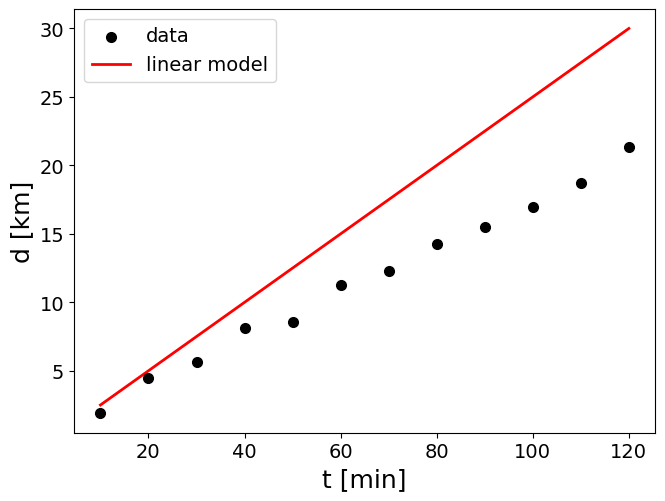

In [6]:
# Plot data and model

# ===============================================
# Test different values for the velocity and see which one fits best!
v = 15
# ===============================================

# plot data
scatter(t,d,color = "black",zorder=3, label = "data")
# plot model
plot(t,m(t,v),color = "red",label="linear model")

xlabel("t [min]")
ylabel("d [km]")

legend(loc = "upper left");

The loss function quantifying the deviation between data  $D = \{(t_{1}, d_{1}), (t_{2}, d_{2}),\dots\, (t_{n}, d_{n})\} $ and model $m(t_i,v)$ can be defined as:
\begin{equation}
l(v) = \frac{1}{n}\sum_{i = 1}^n \big( d^{i} - m(t_{i},v) \big)^2 
\end{equation}
For a given dataset the loss function only depends on the model parameters, in our case the velocity $v$.

In [7]:
# ===============================================
# Define the loss function
loss(v) = 0
# ===============================================

# ===============================================
# Define the derivative of the loss function with respect to the velocity v
dloss(v) = 0
# ===============================================


dloss (generic function with 1 method)

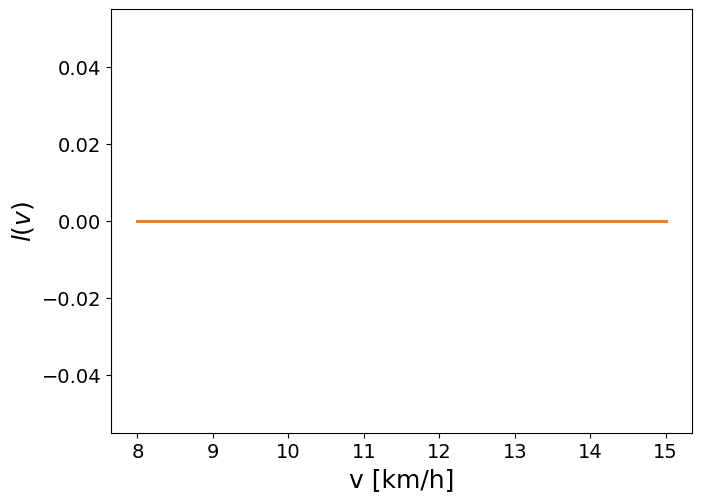

PyObject Text(36.0, 0.5, '$l(v)$')

In [8]:
# plot the loss function

# create values of velocities for which the loss function should be evaluated
test_velocities = range(8,15,length = 20)

# evaluate the loss function for some test velocities
losses = zeros(size(test_velocities,1))
for (index,test) in enumerate(test_velocities)
    losses[index] = loss(test)
end

# evaluate the gradient of the loss function for some test velocities
dlosses = zeros(size(test_velocities,1))
for (index,test) in enumerate(test_velocities)
    dlosses[index] = dloss(test)
end

plot(test_velocities',losses)
plot(test_velocities',dlosses)

xlabel("v [km/h]")
ylabel(L"$l(v)$")


In [9]:
result,trace = gradient_descent(loss,dloss, 1,maxiters = 10000)
println("Optimal velocity [km/h]: ",result)
println("Optimal loss: ",trace[end,end])
println("Iterations: ", size(trace,2))

Optimal velocity [km/h]: 1
Optimal loss: 0
Iterations: 10001


In [10]:
println("A real marathon of 42 km would take ", round(42/result,digits = 2), " hours")

A real marathon of 42 km would take 42.0 hours
